Add to the path the generator folder.

In [1]:
import sys
from pathlib import Path

path = Path("../generator")

sys.path.insert(0, path.as_posix())

pwd = path.parent

In [2]:
import pandas as pd
from generator import TimeSeriesGenerator

In [3]:
NUMBER_SERIES = 10
NUMBER_DAYS = 260

In [4]:
configuration = {
    "meta": {
        "number_of_observations": NUMBER_DAYS,
        "path": "./timeseries/",
        "time_series_name": "01-base",
    },
    "base_line": {"base": 10, "variance": 2},
    "timestamps": {"start": 0, "step": 1},
    "trend": {"slope": 0.1},
    "season": {"height": 5, "period": 21},
    "breaks": [{"from": 10, "to": 100, "value": 10}],
}

In [5]:
# Generate time series
generator = TimeSeriesGenerator(configuration["meta"])

series = []
for number in range(1, NUMBER_SERIES + 1):

    # Add randomness to differentiate the time series
    configuration["base_line"]["base"] = np.random.randint(low=10, high=50)

    configuration["trend"]["slope"] = 0.35 * np.random.rand()

    configuration["season"]["height"] = np.abs(5 * np.random.rand())
    configuration["season"]["period"] = np.random.randint(low=21, high=120)

    configuration["breaks"][0]["from"] = np.random.randint(low=21, high=120)
    configuration["breaks"][0]["to"] = np.random.randint(
        low=configuration["breaks"][0]["from"], high=NUMBER_DAYS
    )
    configuration["breaks"][0]["value"] = np.random.randint(low=5, high=10)

    generator.generate(configuration)
    ts = generator.get_business_like()
    ts.name = number
    series.append(ts)

# Collect all time series
prices_df = pd.DataFrame(series).T
prices_df.index.name = "date"

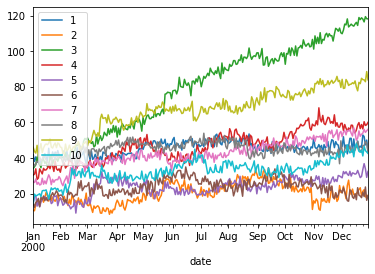

In [6]:
prices_df.plot()